# Modeling Domestic Gross Revenue for Movies from IMDb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import date
from sklearn import preprocessing
from itertools import combinations
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from tqdm import tqdm
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('imdb_data_cleaned.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

Setting Y variables for modeling and dropping them from the dataframe:

In [3]:
opn_wknd = df.loc[df.index, 'opn_wknd']
gross = df.loc[df.index, 'gross']
log_gross = np.log(gross)

df.drop(columns=['gross', 'opn_wknd'], inplace=True)
df.drop(columns=['title', 'directors', 'writers', 'cast'], inplace=True)

Dropping columns with low relevance with response and other variables:

In [4]:
df.drop(columns=['Biography', 'Comedy', 'History', 'Music', 'Musical', 'Mystery', 'Sport', 'War', 'Western'], inplace=True)

In [5]:
df = sm.add_constant(df)

In [6]:
df.head()

,const,budget,runtime,PG,PG-13,R,Action,Adventure,Animation,Crime,...,Family,Fantasy,Horror,Romance,Sci-Fi,Thriller,days,dir_rank,wri_rank,cast_rank
0,1.0,2450.0,138.0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,1759,1066,2259,17850
1,1.0,3560.0,181.0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,534,1080,2276,17829
2,1.0,2370.0,162.0,0,1,0,1,1,0,0,...,0,1,0,0,1,0,3950,842,1749,17597
3,1.0,2000.0,134.0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,968,1068,2282,17846
4,1.0,3210.0,149.0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,898,1080,2276,17829


Lets fit a couple of OLS models to get a baseline, and test different y variables:

In [7]:
model = sm.OLS(gross, df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sun, 11 Oct 2020   Prob (F-statistic):          2.00e-309
Time:                        22:56:51   Log-Likelihood:                -18611.
No. Observations:                2363   AIC:                         3.726e+04
Df Residuals:                    2342   BIC:                         3.738e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -779.6117    156.450     -4.983      0.000   -1086.406    -472.817
budget         0.6144      0.040     15.294      0.000       0.536       0.693
runtime        7.8394      0.908      8.637      0.000       6.060       9.619
PG          -111.3155     61.728     -1.803      0.071    -232.362       9.731
PG-13       -200.5907     55.136     -3.638      0.000    -308.711     -92.470
R           -215.1764     54.149     -3.974      0.000    -321.362    -108.991
Action      -113.8429     36.263     -3.139      0.002    -184.953     -42.733
Adventure     45.4010     39.897      1.138      0.255     -32.836     123.638
Animation    251.1870     64.925      3.869      0.000     123.871     378.503
Crime       -154.7411     40.553     -3.816      0.000    -234.265     -75.217
Drama        -58.2889     33.815     -1.724      0.085    -124.599       8.021
Family      -144.0239     65.367     -2.203      0.028    -272.207     -15.840
Fantasy     -117.7329     37.355     -3.152      0.002    -190.985     -44.481
Horror      -130.2740     44.146     -2.951      0.003    -216.843     -43.705
Romance     -104.1675     38.865     -2.680      0.007    -180.381     -27.954
Sci-Fi       -60.0241     37.115     -1.617      0.106    -132.806      12.757
Thriller    -160.3354     32.762     -4.894      0.000    -224.581     -96.090
days           0.0170      0.005      3.500      0.000       0.007       0.027
dir_rank       0.5794      0.067      8.693      0.000       0.449       0.710
wri_rank       0.2132      0.031      6.912      0.000       0.153       0.274
cast_rank      0.0075      0.007      1.065      0.287      -0.006       0.021
==============================================================================
Omnibus:                     1394.380   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22698.805
Skew:                           2.466   Prob(JB):                         0.00
Kurtosis:                      17.360   Cond. No.                     2.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
model = sm.OLS(log_gross, df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 11 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:57:01   Log-Likelihood:                -1631.7
No. Observations:                2363   AIC:                             3305.
Df Residuals:                    2342   BIC:                             3426.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0017      0.119     42.197      0.000       4.769       5.234
budget         0.0003   3.04e-05     10.820      0.000       0.000       0.000
runtime        0.0063      0.001      9.118      0.000       0.005       0.008
PG            -0.0569      0.047     -1.218      0.224      -0.149       0.035
PG-13         -0.1487      0.042     -3.560      0.000      -0.231      -0.067
R             -0.1482      0.041     -3.613      0.000      -0.229      -0.068
Action        -0.0955      0.027     -3.476      0.001      -0.149      -0.042
Adventure      0.0012      0.030      0.039      0.969      -0.058       0.060
Animation      0.1932      0.049      3.928      0.000       0.097       0.290
Crime         -0.2595      0.031     -8.447      0.000      -0.320      -0.199
Drama         -0.0431      0.026     -1.684      0.092      -0.093       0.007
Family        -0.0836      0.050     -1.687      0.092      -0.181       0.014
Fantasy       -0.1674      0.028     -5.916      0.000      -0.223      -0.112
Horror        -0.5215      0.033    -15.594      0.000      -0.587      -0.456
Romance       -0.1319      0.029     -4.480      0.000      -0.190      -0.074
Sci-Fi        -0.2221      0.028     -7.899      0.000      -0.277      -0.167
Thriller      -0.1229      0.025     -4.950      0.000      -0.172      -0.074
days        2.056e-05   3.69e-06      5.578      0.000    1.33e-05    2.78e-05
dir_rank       0.0007   5.05e-05     14.112      0.000       0.001       0.001
wri_rank       0.0003   2.34e-05     12.265      0.000       0.000       0.000
cast_rank   9.346e-06   5.33e-06      1.755      0.079    -1.1e-06    1.98e-05
==============================================================================
Omnibus:                       40.696   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.660
Skew:                           0.136   Prob(JB):                     2.03e-15
Kurtosis:                       3.783   Cond. No.                     2.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looks like log_gross fits better. Lets split and scale the data for training and testing:

In [9]:
df, df_test, y, y_test = train_test_split(df, log_gross, test_size=.2, random_state=10)

In [10]:
df_scaled = pd.DataFrame(preprocessing.scale(df), columns=(df.columns))
df_test_scaled = pd.DataFrame(preprocessing.scale(df_test), columns=(df_test.columns))

## OLS

Since there are no hyperparameters to tune, we'll focus on feature selection. I know I want to keep the first 6 features in the dataframe, but I want to know which combination of the remaining features will yield the best results. I'll use itertools to generate a list of all possible combinations, and iteratively test every combo to see which one generates the best average scores in 10-fold cross val:

In [12]:
# generating list of combos of all features except for first 6
x_combos = []
for n in range(1, len(df_scaled.iloc[:, 7:].columns)+1):
   combos = combinations(df_scaled.iloc[:, 7:].columns, n)
   x_combos.extend(combos)

In [13]:
len(x_combos)

16383

In [14]:
# testing all 16000+ combinations
r_sqd = {}
mse = {}    
for n in tqdm((range(0, len(x_combos)))):
       combo_list = list(x_combos[n]) + list(df_scaled.iloc[:, :7].columns)
       x = df_scaled[combo_list]
       ols = LinearRegression()
       cv_scores = cross_validate(ols, x, y, cv=10, scoring=('neg_mean_squared_error', 'r2'), n_jobs=-1)
       r_sqd[str(combo_list)] = np.mean(cv_scores['test_r2'])
       mse[str(combo_list)] = np.mean(cv_scores['test_neg_mean_squared_error'])
print("Outcomes from the Best Linear Regression Model:")
max_r = max(r_sqd.values())
min_mse = abs(max(mse.values()))
print("Maximum Average Test R-Squared:", max_r.round(5))
print("Minimum Average Test MSE:", min_mse.round(3))
for possibles, m in mse.items():
    if -m == min_mse:
        print("The Combination of Variables:", possibles)
        ols_features = eval(possibles)

100%|██████████| 16383/16383 [07:52<00:00, 34.69it/s]

Outcomes from the Best Linear Regression Model:
Maximum Average Test R-Squared: 0.60346
Minimum Average Test MSE: 0.234
The Combination of Variables: ['Animation', 'Crime', 'Fantasy', 'Horror', 'Romance', 'Sci-Fi', 'Thriller', 'days', 'dir_rank', 'wri_rank', 'cast_rank', 'const', 'budget', 'runtime', 'PG', 'PG-13', 'R', 'Action']


Lets validate the model using the train/test data:

In [15]:
ols = LinearRegression()
fit = ols.fit(df_scaled[ols_features], y)
predict = ols.predict(df_test_scaled[ols_features])
ols_test_mse = sum((np.exp(y_test) - np.exp(predict))**2)/len(y_test)
ols_test_r2 = r2_score(y_test, predict)
print('OLS test RMSE:', np.sqrt(ols_test_mse))
print('OLS test R2:', ols_test_r2)

OLS test RMSE: 688.0500314583177
OLS test R2: 0.5209637446332325


Lets take a look at the residuals:

In [16]:
%matplotlib inline

Text(0.5, 1.0, 'Distribution of OLS Residuals')

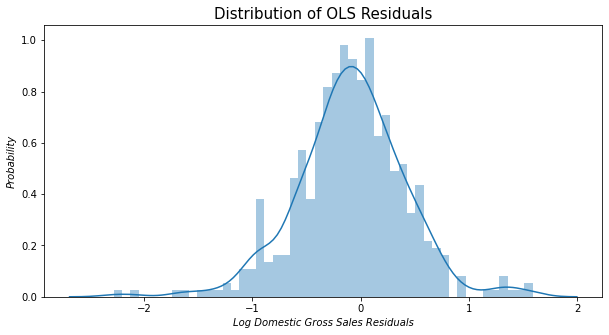

In [17]:
plt.figure(figsize=[10,5])
sns.distplot(predict-y_test, bins=50)
plt.xlabel('Log Domestic Gross Sales Residuals', fontsize = 10, style = 'italic')
plt.ylabel('Probability',fontsize = 10, style = 'italic')
plt.title('Distribution of OLS Residuals',fontsize = 15,)

## Lasso

We're going to use Lasso to filter out polynomial features, so lets create the polyfeatures first:

In [18]:
poly = preprocessing.PolynomialFeatures(2)
poly_x = poly.fit_transform(df)
poly_x_test = poly.fit_transform(df_test)
feature_names = poly.get_feature_names(df.columns)
df_poly = pd.DataFrame(poly_x, columns=feature_names)
df_test_poly = pd.DataFrame(poly_x_test, columns=feature_names)

poly_scaled = pd.DataFrame(preprocessing.scale(df_poly), columns=(df_poly.columns))
poly_test_scaled = pd.DataFrame(preprocessing.scale(df_test_poly), columns=(df_test_poly.columns))

/home/mason/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/mason/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


We use GridSearchCV to find the best alpha using 10-fold CV:

In [19]:
lasso_parameters = {'alpha': np.arange(.0005,.005,.0001)}

In [20]:
grid_search = GridSearchCV(estimator=Lasso(), param_grid = lasso_parameters, cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
grid_search.fit(poly_scaled, y)
print("Outcomes from the Best Lasso Regression Model:")
print("Average Test MSE:", -grid_search.best_score_.round(3))
print("The optimal alpha (rounded to nearest whole number):", grid_search.best_params_['alpha'])

Outcomes from the Best Lasso Regression Model:
Average Test MSE: 0.208
The optimal alpha (rounded to nearest whole number): 0.002700000000000001


In [21]:
lasso = grid_search.best_estimator_
cv_scores = cross_validate(lasso, poly_scaled, y, cv=10, scoring=('neg_mean_squared_error', 'r2'))
r = np.mean(cv_scores['test_r2'])
m = np.mean(cv_scores['test_neg_mean_squared_error'])
print("Outcomes from the Best Lasso Regression Model:")
print("Average Test R-Squared:", r.round(4))
print("Average Test MSE:", -m.round(3))

Outcomes from the Best Lasso Regression Model:
Average Test R-Squared: 0.647
Average Test MSE: 0.208


In [22]:
lasso.fit(poly_scaled, y)
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -3.01879803e-02,  0.00000000e+00, -1.96827414e-02,
       -0.00000000e+00,  0.00000000e+00, -5.64257044e-03,  1.12200109e-01,
        0.00000000e+00, -5.14180373e-02, -1.38251720e-01, -0.00000000e+00,
       -8.87227154e-02, -1.69272287e-02,  7.40887762e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -6.02285953e-02,
        1.84732817e-02,  0.00000000e+00, -1.91033754e-02, -4.25696611e-02,
       -0.00000000e+00, -4.33710997e-03, -2.28716912e-04,  5.62268428e-04,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.45675833e-03, -0.00000000e+00, -0.00000000e+00,
       -1.13140206e-03,  0.00000000e+00,  1.14612358e-02,  4.03446759e-02,
        0.00000000e+00, -

Much better fit than OLS, and we've knocked out some features. Lets extract the features whose coefficients aren't 0, and repeat the process:

In [23]:
features = []
list(features)
for i in range(0,len(poly_scaled.columns)):
    if lasso.coef_[i] != 0:
        features.append(poly_scaled.columns[i])
print(features)
len(features)

['PG-13', 'Action', 'Crime', 'Drama', 'Fantasy', 'Horror', 'Sci-Fi', 'Thriller', 'days', 'const Crime', 'const Drama', 'const Fantasy', 'const Horror', 'const Sci-Fi', 'const Thriller', 'const days', 'budget PG', 'budget Action', 'budget Animation', 'budget Crime', 'budget Horror', 'budget Romance', 'budget Sci-Fi', 'budget Thriller', 'budget wri_rank', 'runtime Horror', 'runtime Romance', 'runtime dir_rank', 'runtime cast_rank', 'PG Action', 'PG Family', 'PG Horror', 'PG Romance', 'PG Thriller', 'PG days', 'PG-13^2', 'PG-13 Crime', 'PG-13 Family', 'PG-13 Fantasy', 'PG-13 Horror', 'PG-13 dir_rank', 'R Crime', 'R Drama', 'R Fantasy', 'R Horror', 'R Romance', 'R Sci-Fi', 'R days', 'R wri_rank', 'Action Drama', 'Action Family', 'Action Fantasy', 'Action Romance', 'Action dir_rank', 'Action wri_rank', 'Adventure Crime', 'Adventure Family', 'Adventure Sci-Fi', 'Animation Crime', 'Animation Drama', 'Animation Fantasy', 'Animation Sci-Fi', 'Animation days', 'Animation wri_rank', 'Animation ca

120

Retuning Lasso with selected features:

In [24]:
lasso_parameters = {'alpha': np.arange(.00005,.001,.00005)}
grid_search = GridSearchCV(estimator=Lasso(), param_grid = lasso_parameters, cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
grid_search.fit(poly_scaled[features], y)
print("Outcomes from the Best Lasso Regression Model:")
print("Average Test MSE:", -grid_search.best_score_.round(3))
print("The optimal alpha (rounded to nearest whole number):", grid_search.best_params_['alpha'])

Outcomes from the Best Lasso Regression Model:
Average Test MSE: 0.2
The optimal alpha (rounded to nearest whole number): 0.0006500000000000001


In [25]:
lasso = grid_search.best_estimator_
cv_scores = cross_validate(lasso, poly_scaled[features], y, cv=10, scoring=('neg_mean_squared_error', 'r2'))
r = np.mean(cv_scores['test_r2'])
m = np.mean(cv_scores['test_neg_mean_squared_error'])
print("Outcomes from the Best Lasso Regression Model:")
print("Average Test R-Squared:", r.round(4))
print("Average Test MSE:", -m.round(3))
lasso.fit(poly_scaled[features], y)
lasso.coef_

Outcomes from the Best Lasso Regression Model:
Average Test R-Squared: 0.6618
Average Test MSE: 0.2


array([-0.0159538 , -0.01583125, -0.00738414,  0.23150484, -0.0905078 ,
       -0.25765987, -0.10524406, -0.05518255,  0.14301774, -0.11235693,
        0.00427877, -0.04056653, -0.00951465, -0.01216077, -0.        ,
        0.00085728, -0.01559081, -0.03234933,  0.00818852,  0.05596232,
        0.00659287,  0.04259148,  0.03949805,  0.03059061,  0.14787361,
       -0.04586183, -0.0615935 ,  0.16284504,  0.06243605, -0.00773594,
       -0.03782366, -0.00716375, -0.00914728, -0.02483728,  0.04265885,
       -0.06575339, -0.00578295,  0.00513451, -0.07514515,  0.09366738,
        0.05583334, -0.03802134, -0.02307812, -0.02784611,  0.09131002,
        0.01090467, -0.01758626,  0.00437426, -0.01725917, -0.0276811 ,
       -0.        ,  0.01439913, -0.00131472, -0.00800794, -0.00125261,
       -0.02522341, -0.03005603,  0.01741209,  0.01167618,  0.02712366,
        0.02727008, -0.00335376, -0.03948767, -0.        ,  0.03451019,
       -0.01555514, -0.02653387,  0.00445488,  0.01417256,  0.01

Now lets validate the model on the test/train split:

In [26]:
predict = lasso.predict(poly_test_scaled[features])
lasso_test_mse = sum((np.exp(y_test) - np.exp(predict))**2)/len(y_test)
lasso_test_r2 = r2_score(y_test, predict)
print('Lasso test RMSE:', np.sqrt(lasso_test_mse))
print('Lasso test R2:', lasso_test_r2)

Lasso test RMSE: 651.2283453825521
Lasso test R2: 0.5418518589305822


## Ridge

We'll feed the best features from the Lasso model into the ridge model, and tune it using the same method from Lasso:

In [27]:
ridge_parameters = {'alpha': np.arange(.00005,.001,.00005)}
grid_search = GridSearchCV(estimator=Ridge(), param_grid = ridge_parameters, cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
grid_search.fit(poly_scaled[features], y)
print("Outcomes from the Best Ridge Regression Model:")
print("Average Test MSE:", -grid_search.best_score_.round(3))
print("The optimal alpha (rounded to nearest whole number):", grid_search.best_params_['alpha'])

Outcomes from the Best Ridge Regression Model:
Average Test MSE: 0.201
The optimal alpha (rounded to nearest whole number): 0.0009500000000000001


In [28]:
ridge = grid_search.best_estimator_
cv_scores = cross_validate(ridge, poly_scaled[features], y, cv=10, scoring=('neg_mean_squared_error', 'r2'))
r = np.mean(cv_scores['test_r2'])
m = np.mean(cv_scores['test_neg_mean_squared_error'])
print("Outcomes from the Best Lasso Regression Model:")
print("Average Test R-Squared:", r.round(4))
print("Average Test MSE:", -m.round(3))

Outcomes from the Best Lasso Regression Model:
Average Test R-Squared: 0.6596
Average Test MSE: 0.201


In [29]:
ridge.fit(poly_scaled[features], y)
ridge.coef_

array([-0.04806915, -0.01384958, -0.04941268,  0.09004816, -0.05558127,
       -0.10275818, -0.10705943, -0.03232228,  0.08096546, -0.04941268,
        0.09004816, -0.05558127, -0.10275818, -0.10705943, -0.03232228,
        0.08096546, -0.01852705, -0.04225269,  0.01105706,  0.0619846 ,
        0.00353749,  0.0479592 ,  0.04705145,  0.03927223,  0.14282306,
       -0.03939206, -0.06584266,  0.22807611,  0.03107469, -0.01125001,
       -0.04234307, -0.00910055, -0.01254031, -0.02598054,  0.04712651,
       -0.04806915, -0.00505604,  0.00453707, -0.0821337 ,  0.10882695,
        0.06950372, -0.03774809, -0.028386  , -0.03292463,  0.10972205,
        0.01270154, -0.01907922,  0.00661617, -0.01816016, -0.02930813,
        0.00342882,  0.01805136, -0.00056666, -0.00134403, -0.00604971,
       -0.02671431, -0.03356307,  0.01850995,  0.01374761,  0.03133711,
        0.03189321, -0.00297945, -0.04654606, -0.01633326,  0.04701731,
       -0.04941268, -0.02760461,  0.00369844,  0.01604557,  0.01

Now lets validate the model on our test/train split:

In [30]:
predict = ridge.predict(poly_test_scaled[features])
ridge_test_mse = sum((np.exp(y_test) - np.exp(predict))**2)/len(y_test)
ridge_test_r2 = r2_score(y_test, predict)
print('Ridge test RMSE:', np.sqrt(ridge_test_mse))
print('Ridge test R2:', ridge_test_r2)

Ridge test RMSE: 649.1424403258687
Ridge test R2: 0.5368711713258436


## KNearest Neighbors

Lets use our original features, and feed the model into GridSearchCV to find the optimal number of clusters:

In [31]:
KNN_parameters = {'n_neighbors': np.arange(1,21,1)}
grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid = KNN_parameters, cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
grid_search.fit(df_scaled, y)
print("Outcomes from the Best KNN Regression Model:")
print("Minimum Average Test MSE:", -grid_search.best_score_.round(3))
print("The optimal n:", grid_search.best_params_['n_neighbors'])

Outcomes from the Best KNN Regression Model:
Minimum Average Test MSE: 0.256
The optimal n: 9


In [32]:
knn = grid_search.best_estimator_
cv_scores = cross_validate(knn, df_scaled, y, cv=10, scoring=('neg_mean_squared_error', 'r2'))
r = np.mean(cv_scores['test_r2'])
m = np.mean(cv_scores['test_neg_mean_squared_error'])
print("Outcomes from the Best Linear Regression Model:")
print("Maximum Average Test R-Squared:", r.round(4))
print("Minimum Average Test MSE:", -m.round(3))

Outcomes from the Best Linear Regression Model:
Maximum Average Test R-Squared: 0.5666
Minimum Average Test MSE: 0.256


In [33]:
knn.fit(df_scaled, y)

KNeighborsRegressor(n_neighbors=9)

Now lets validate the model on the test/train split:

In [34]:
predict = knn.predict(df_test_scaled)
knn_test_mse = sum((np.exp(y_test) - np.exp(predict))**2)/len(y_test)
knn_test_r2 = r2_score(y_test, predict)
print('KNN test RMSE:', np.sqrt(knn_test_mse))
print('KNN test R2:', knn_test_r2)

KNN test RMSE: 653.7613495036005
KNN test R2: 0.5214384188531103


## XGBoost

We'll be using gridsearch to tune each hyperparameter in oder of importance. Then, once we've tuned the model once, we'll extract all features that are deemed 'important' by the model and retune.

First, define our grid of hyperparameters:

In [35]:
learning_rate = [round(x,2) for x in np.linspace(start = .01, stop = .6, num = 60)]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_depth = range(3,10,1)
child_weight = range(1,6,2)
gamma = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5,2]
subsample = [.6, .7, .8, .9, 1]
col_sample = [.6, .7, .8, .9, 1]

In [36]:
# Tuning the learning_rate:
xgb_tune = XGBRegressor(n_estimators = 100,max_depth = 3, min_child_weight = 1, subsample = .8, colsample_bytree = 1,gamma = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'learning_rate':learning_rate},cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
xgb_grid.fit(df,y)
best_learning_rate = xgb_grid.best_params_['learning_rate']
print("Best learning_rate:", best_learning_rate)

Best learning_rate: 0.18


In [37]:
# Tuning the n_estimators:
xgb_tune = XGBRegressor(learning_rate = best_learning_rate, max_depth = 3, min_child_weight = 1, subsample = .8, colsample_bytree = 1,gamma = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'n_estimators': n_estimators},cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
xgb_grid.fit(df,y)
best_n = xgb_grid.best_params_['n_estimators']
print("Best n_estimators:", best_n)

Best n_estimators: 100


In [38]:
# Tuning max_depth and min_child_weight:
xgb_tune = XGBRegressor(learning_rate = best_learning_rate, n_estimators = best_n, subsample = .8, colsample_bytree = 1,gamma = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'max_depth': max_depth, 'min_child_weight': child_weight},cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
xgb_grid.fit(df,y)
best_depth = xgb_grid.best_params_['max_depth']
best_weight = xgb_grid.best_params_['min_child_weight']
print("Best max_depth:", best_depth)
print("Best min_child_weight:", best_weight)

Best max_depth: 7
Best min_child_weight: 5


In [39]:
# Tuning gamma:
xgb_tune = XGBRegressor(learning_rate = best_learning_rate, n_estimators = best_n, max_depth = best_depth, min_child_weight = best_weight, subsample = .8, colsample_bytree = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'gamma': gamma},cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
xgb_grid.fit(df,y)
best_gamma = xgb_grid.best_params_['gamma']
print("Best gamma:", best_gamma)

Best gamma: 1


In [40]:
# Tuning subsample and colsample_bytree:
xgb_tune = XGBRegressor(learning_rate = best_learning_rate, n_estimators = best_n, max_depth = best_depth, min_child_weight = best_weight, gamma = best_gamma, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'subsample': subsample, 'colsample_bytree': col_sample},cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
xgb_grid.fit(df,y)
best_subsample = xgb_grid.best_params_['subsample']
best_col_sample = xgb_grid.best_params_['colsample_bytree']
print("Best subsample:", best_subsample)
print("Best colsample_bytree:", best_col_sample)

Best subsample: 0.9
Best colsample_bytree: 0.8


Lets see if we can squeeze some more out of subsample and colsample_bytree:

In [41]:
# Rigorously tuning subsample and colsample_bytree:
subsample = [best_subsample-.02, best_subsample - .01, best_subsample, best_subsample +.01, best_subsample + .02]
col_sample = [best_col_sample-.02, best_col_sample - .01, best_col_sample, best_col_sample+.01, best_col_sample+ .02]

In [42]:
xgb_tune = XGBRegressor(learning_rate = best_learning_rate, n_estimators = best_n, max_depth = best_depth, min_child_weight = best_weight, gamma = best_gamma, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'subsample': subsample, 'colsample_bytree': col_sample},cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
xgb_grid.fit(df,y)
best_subsample = xgb_grid.best_params_['subsample']
best_col_sample = xgb_grid.best_params_['colsample_bytree']
print("Best subsample:", best_subsample)
print("Best colsample_bytree:", best_col_sample)

Best subsample: 0.9
Best colsample_bytree: 0.78


Cross-validate the model:

In [43]:
xgb = XGBRegressor(learning_rate = best_learning_rate, n_estimators = best_n, max_depth = best_depth, min_child_weight = best_weight, subsample = best_subsample, colsample_bytree = best_col_sample, gamma = best_gamma, n_jobs = -1)
cv_scores = cross_validate(xgb, df, y, cv=10, scoring=('neg_mean_squared_error', 'r2'), verbose = 0, n_jobs = -1)
r = np.mean(cv_scores['test_r2'])
m = np.mean(cv_scores['test_neg_mean_squared_error'])
print("Outcomes from the Best XGBoost Regression Model:")
print("Average Test R-Squared:", r.round(5))
print("Average Test MSE:", -m.round(3))

Outcomes from the Best XGBoost Regression Model:
Average Test R-Squared: 0.67808
Average Test MSE: 0.19


Looks like a big improvement. Lets extract the important features an repeat the process:

In [44]:
xgb.fit(df, y)
importances = list(xgb.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature,importance in zip(df.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance:{}'.format(*pair)) for pair in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
sorted_importances = [importance[1] for importance in feature_importances]
features = []
for i in range(0, len(sorted_features)):
    if sorted_importances[i] != 0:
        features.append(sorted_features[i])

Variable: Horror               Importance:0.33000001311302185
Variable: dir_rank             Importance:0.11999999731779099
Variable: wri_rank             Importance:0.10000000149011612
Variable: Animation            Importance:0.05000000074505806
Variable: budget               Importance:0.03999999910593033
Variable: Sci-Fi               Importance:0.03999999910593033
Variable: Thriller             Importance:0.03999999910593033
Variable: cast_rank            Importance:0.03999999910593033
Variable: runtime              Importance:0.029999999329447746
Variable: Crime                Importance:0.029999999329447746
Variable: Family               Importance:0.029999999329447746
Variable: PG-13                Importance:0.019999999552965164
Variable: Action               Importance:0.019999999552965164
Variable: Drama                Importance:0.019999999552965164
Variable: Fantasy              Importance:0.019999999552965164
Variable: Romance              Importance:0.019999999552965164


In [45]:
print(features)

['Horror', 'dir_rank', 'wri_rank', 'Animation', 'budget', 'Sci-Fi', 'Thriller', 'cast_rank', 'runtime', 'Crime', 'Family', 'PG-13', 'Action', 'Drama', 'Fantasy', 'Romance', 'days', 'PG', 'R', 'Adventure']


In [46]:
X = df[features]
cv_scores = cross_validate(xgb, X, y, cv=10, scoring=('neg_mean_squared_error', 'r2'), verbose = 0, n_jobs = -1)
r = np.mean(cv_scores['test_r2'])
m = np.mean(cv_scores['test_neg_mean_squared_error'])
print("Outcomes from the Best Linear Regression Model:")
print("Maximum Average Test R-Squared:", r.round(5))
print("Minimum Average Test MSE:", -m.round(3))

Outcomes from the Best Linear Regression Model:
Maximum Average Test R-Squared: 0.66458
Minimum Average Test MSE: 0.198


Retuning with new features:

In [47]:
learning_rate = [round(x,2) for x in np.linspace(start = .01, stop = .6, num = 60)]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_depth = range(3,10,1)
child_weight = range(1,6,2)
gamma = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5,2]
subsample = [.6, .7, .8, .9, 1]
col_sample = [.6, .7, .8, .9, 1]

In [48]:
# Tuning learning_rate:
xgb_tune = XGBRegressor(n_estimators = 100,max_depth = 3, min_child_weight = 1, subsample = .8, colsample_bytree = 1,gamma = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'learning_rate':learning_rate},cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
xgb_grid.fit(X,y)
best_learning_rate = xgb_grid.best_params_['learning_rate']
print("Best learning_rate:", best_learning_rate)

Best learning_rate: 0.14


In [49]:
# Tuning n_estimators:
xgb_tune = XGBRegressor(learning_rate = best_learning_rate, max_depth = 3, min_child_weight = 1, subsample = .8, colsample_bytree = 1,gamma = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'n_estimators': n_estimators},cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
xgb_grid.fit(X,y)
best_n = xgb_grid.best_params_['n_estimators']
print("Best n_estimators:", best_n)

Best n_estimators: 400


In [50]:
# Tuning max_depth and min_child_weight
xgb_tune = XGBRegressor(learning_rate = best_learning_rate, n_estimators = best_n, subsample = .8, colsample_bytree = 1,gamma = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'max_depth': max_depth, 'min_child_weight': child_weight},cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
xgb_grid.fit(X,y)
best_depth = xgb_grid.best_params_['max_depth']
best_weight = xgb_grid.best_params_['min_child_weight']
print("Best max_depth:", best_depth)
print("Best min_child_weight:", best_weight)

Best max_depth: 4
Best min_child_weight: 3


In [51]:
# Tuning gamma:
xgb_tune = XGBRegressor(learning_rate = best_learning_rate, n_estimators = best_n, max_depth = best_depth, min_child_weight = best_weight, subsample = .8, colsample_bytree = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'gamma': gamma},cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
xgb_grid.fit(X,y)
best_gamma = xgb_grid.best_params_['gamma']
print("Best gamma:", best_gamma)

Best gamma: 1


In [52]:
# Tuning subsample and colsample_bytree:
xgb_tune = XGBRegressor(learning_rate = best_learning_rate, n_estimators = best_n, max_depth = best_depth, min_child_weight = best_weight, gamma = best_gamma, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'subsample': subsample, 'colsample_bytree': col_sample},cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
xgb_grid.fit(X,y)
best_subsample = xgb_grid.best_params_['subsample']
best_col_sample = xgb_grid.best_params_['colsample_bytree']
print("Best subsample:", best_subsample)
print("Best colsample_bytree:", best_col_sample)

Best subsample: 0.9
Best colsample_bytree: 0.8


In [53]:
# Rigorously tuning subsample and colsample_bytree:
subsample = [best_subsample-.02, best_subsample - .01, best_subsample]
col_sample = [best_col_sample-.02, best_col_sample - .01, best_col_sample]

xgb_tune = XGBRegressor(learning_rate = best_learning_rate, n_estimators = best_n, max_depth = best_depth, min_child_weight = best_weight, gamma = best_gamma, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'subsample': subsample, 'colsample_bytree': col_sample},cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
xgb_grid.fit(X,y)
best_subsample = xgb_grid.best_params_['subsample']
best_col_sample = xgb_grid.best_params_['colsample_bytree']
print("Best subsample:", best_subsample)
print("Best colsample_bytree:", best_col_sample)

Best subsample: 0.9
Best colsample_bytree: 0.8


Cross-validating optimal model:

In [54]:
xgb = XGBRegressor(learning_rate = best_learning_rate, n_estimators = best_n, max_depth = best_depth, min_child_weight = best_weight, subsample = best_subsample, colsample_bytree = best_col_sample, gamma = best_gamma, n_jobs = -1)
cv_scores = cross_validate(xgb, X, y, cv=10, scoring=('neg_mean_squared_error', 'r2'), verbose = 0, n_jobs = -1)
r = np.mean(cv_scores['test_r2'])
m = np.mean(cv_scores['test_neg_mean_squared_error'])
print("Outcomes from the Best XGBoost Regression Model:")
print("Average Test R-Squared:", r.round(5))
print("Average Test MSE:", -m.round(3))

Outcomes from the Best XGBoost Regression Model:
Average Test R-Squared: 0.67497
Average Test MSE: 0.192


Nice. Lets fit to the test/train split:

In [55]:
xgb.fit(X,y)
xgb_pred = xgb.predict(df_test[features])
xgb_test_mse = sum((np.exp(y_test) - np.exp(xgb_pred))**2)/len(y_test)
xgb_test_r2 = r2_score(y_test, xgb_pred)
print("Test R2 for XGBoost:", round(xgb_test_r2, 4))
print("Test RMSE for XGBoost:", round(np.sqrt(xgb_test_mse),3))

Test R2 for XGBoost: 0.6074
Test RMSE for XGBoost: 517.264


## Pickling objects for the app:

In [56]:
import pickle

In [57]:
with open('imdb_xgb.pickle', 'wb') as to_write:
    pickle.dump(xgb, to_write)

In [ ]:
with open('y_test.pickle', 'wb') as to_write:
    pickle.dump(y_test, to_write)

In [ ]:
with open('df_test.pickle', 'wb') as to_write:
    pickle.dump(df_test[features], to_write)

In [ ]:
with open('df_train.pickle', 'wb') as to_write:
    pickle.dump(X, to_write)

## Plotting XGBoost

Text(0.5, 1.0, 'Distribution of XGBoost Residuals')

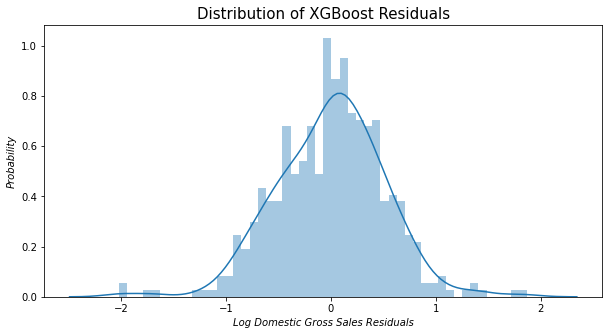

In [58]:
plt.figure(figsize=[10,5])
sns.distplot(predict-y_test, bins=50)
plt.xlabel('Log Domestic Gross Sales Residuals', fontsize = 10, style = 'italic')
plt.ylabel('Probability',fontsize = 10, style = 'italic')
plt.title('Distribution of XGBoost Residuals',fontsize = 15,)

<Figure size 720x360 with 0 Axes>

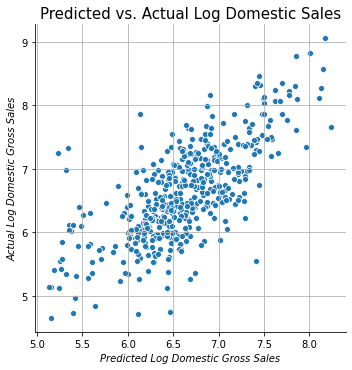

In [61]:
plt.figure(figsize=[10,5])
sns.relplot(data = plot_df, x='predicted', y='actual')
plt.xlabel('Predicted Log Domestic Gross Sales', fontsize = 10, style = 'italic')
plt.ylabel('Actual Log Domestic Gross Sales',fontsize = 10, style = 'italic')
plt.title('Predicted vs. Actual Log Domestic Sales',fontsize = 15,)
plt.grid()